In [ ]:
#Q1 B - classes 
class GeneralNeuron: #defining the first class
    def __init__(self, firing_rate): #attribute number 1
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength): #attribute number 2
        self.firing_rate = stimulus_strength   
        return self.firing_rate

class SensoryNeuron(GeneralNeuron): #defining the first subclass
    def __init__(self, firing_rate, receptor_type): #attributes 1+2
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus_strength):#attribute 3
        self.firing_rate = stimulus_strength
        return self.firing_rate
    
class MotorNeuron(GeneralNeuron): #defining the second subclass
    def __init__(self, firing_rate, target_muscle):#attribure number 1+2
        super().__init__(firing_rate)
        self.target_muscle = target_muscle 
    def control_muscle(self): #attribute number 3
        threshold = random.random() #random threshold for the force 
        if self.firing_rate > threshold:
            return f"Activating {self.target_muscle} with strong force."
        else:
            return f"Activating {self.target_muscle} with weak force."
        
class Photoreceptor(SensoryNeuron): #defining leaf class number 1
    def __init__(self, firing_rate): #attribute number 1
        super().__init__(firing_rate, "light")

    def light_detection(self, light_intensity): #attribute number 2
        self.firing_rate = light_intensity 
        return self.firing_rate        

class Mechanoreceptor(SensoryNeuron): #defining leaf class number 2
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "pressure")

    def pressure_detection(self, pressure_level):
        self.firing_rate = pressure_level
        return self.firing_rate

class AlphaMotorNeuron(MotorNeuron): #defining leaf class number 1
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "skeletal muscle") #unique trait - skeletal muscle

    def skeletal_muscle_control(self):
        threshold = random.random(0,1) #another random threshold for the force 
        if self.firing_rate > threshold:
            return "active - rapid contractions."
        else:
            return "Inactive."

class GammaMotorNeuron(MotorNeuron): #defining leaf class number 2
    def __init__(self, firing_rate):
        super().__init__(firing_rate, "muscle spindle")

    def muscle_spindle_control(self):
        threshold = random.random()
        if self.firing_rate > threshold: #and another random threshold for the force 
            return "Active - slower, gradual response."
        else:
            return "Inactive."


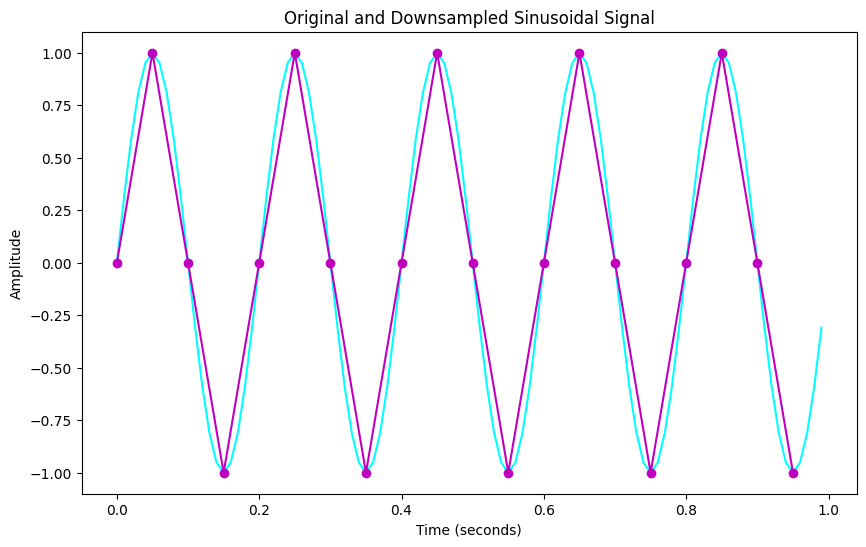

In [44]:
#Q2 - sinusodial function and downsampling
import numpy as np
import matplotlib.pyplot as plt
def sinusodial_sample(signal, step=5):
    downsampled_indices = np.arange(0, len(signal), step)#we samle 20% of the signal 
    max_indices = [] #making two lists - max
    min_indices = [] #and min
    for i in range(1, len(signal) - 1):
        if signal[i] > signal[i-1] and signal[i] > signal[i+1]:  #We add a point if its max
            max_indices.append(i)
        elif signal[i] < signal[i-1] and signal[i] < signal[i+1]:  #We add a point if its min 
            min_indices.append(i)
    downsampled_indices = np.union1d(downsampled_indices, np.union1d(max_indices, min_indices)) #we combine with no repeats
    downsampled_signal = signal[downsampled_indices]
    return downsampled_signal

#trying it out with the data we were given: 
time = np.arange(0, 1, 0.01) #for example, sampling a second with intervals of 0.01
signal = np.sin(2 * np.pi * 5 * time) #using the numpy sin function to create a sinusodial wave in a 5 hz frequency
downsampled_signal = sinusodial_sample(signal)
#creating the figure for the original + downsampled signals with matplot lib
plt.figure(figsize=(10, 6))
plt.plot(time, signal, label='Original Signal', color='cyan')
downsampled_time = time[::5] #making the time points for downsampled signal, with the 5 step skip for the 80% reduction
plt.plot(downsampled_time, downsampled_signal, 'mo-', label='Downsampled Signal') #making sure the max min points stand out in the ds signal
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original and Downsampled Sinusoidal Signal')
plt.show()


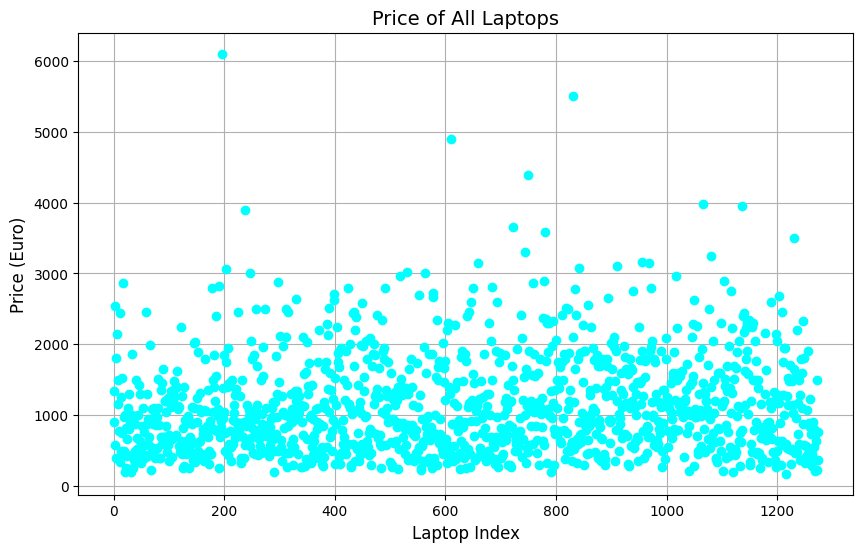

The company with the most expensive laptops is Razer with an average price of 3346.14 Euros.

Average Price for Each Company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

Unique Operating Systems:
['macos' 'no os' 'windows 10' 'mac os x' 'linux' 'android' 'windows 10 s'
 'chrome os' 'windows 7']


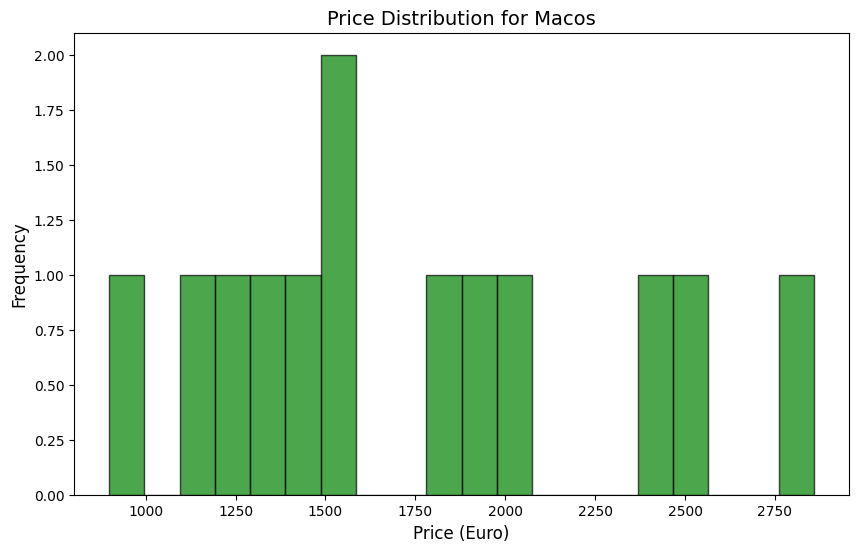

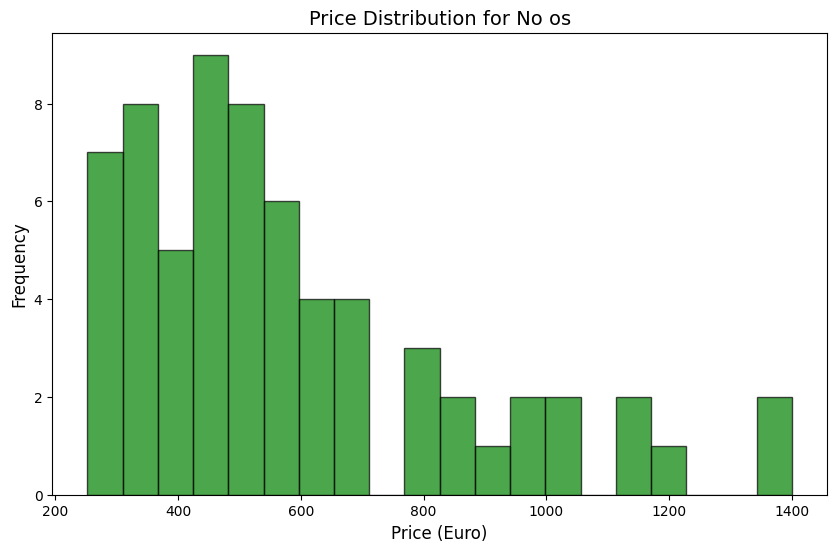

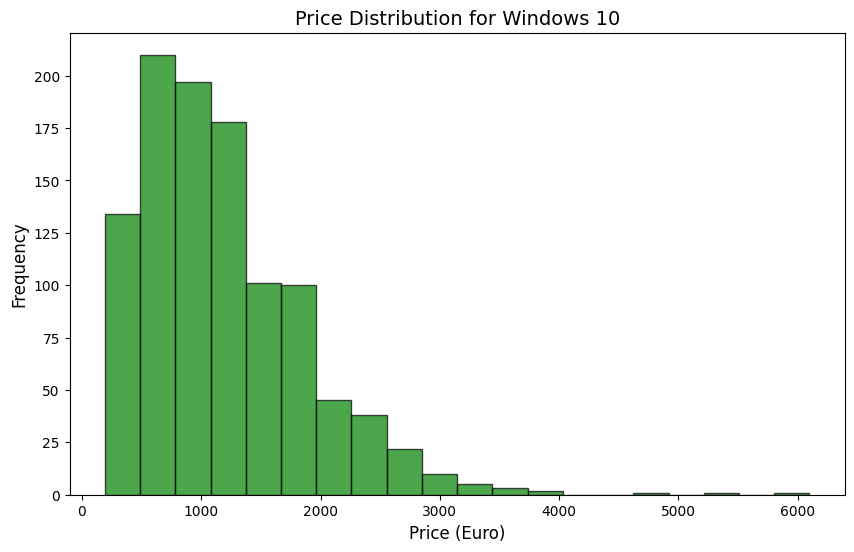

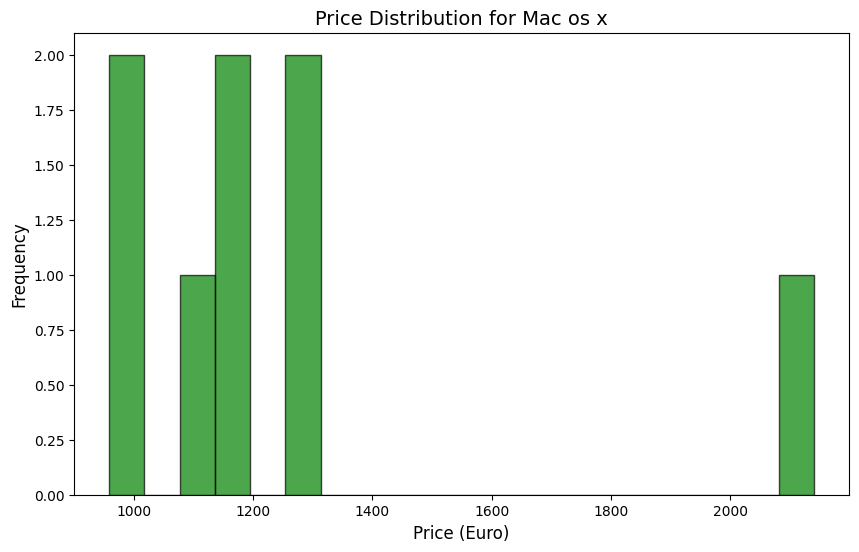

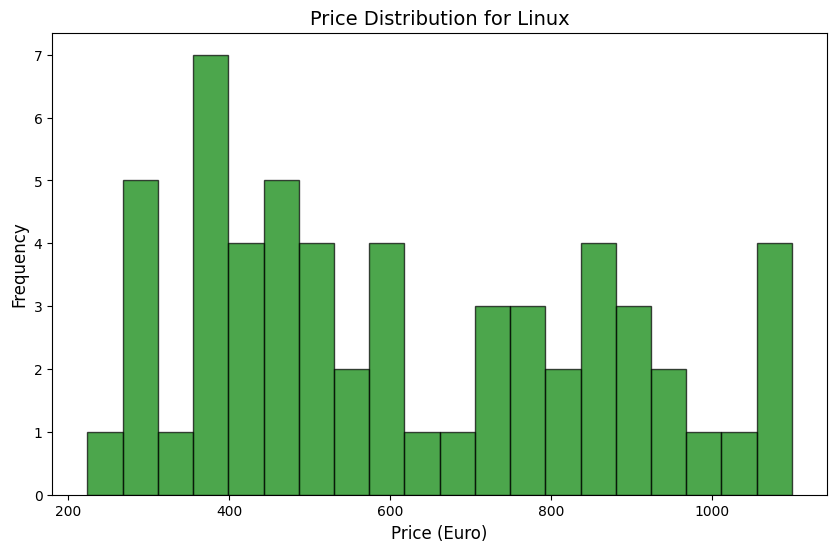

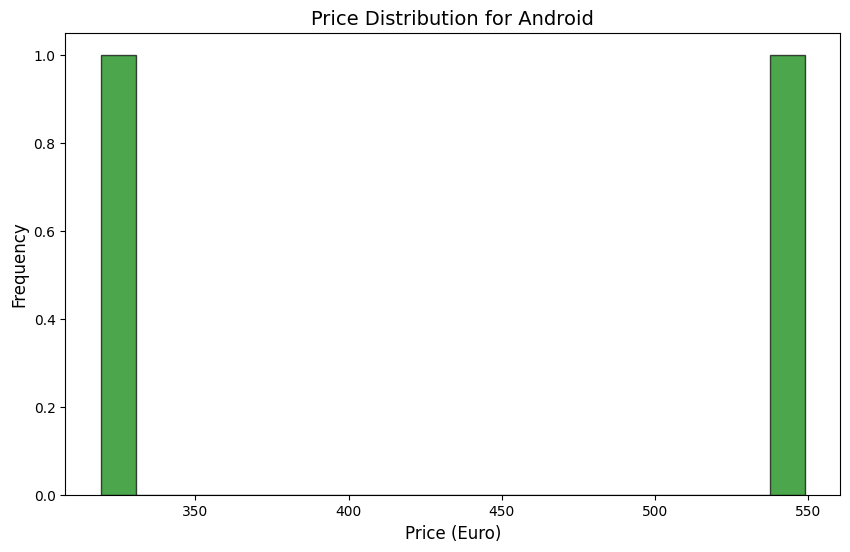

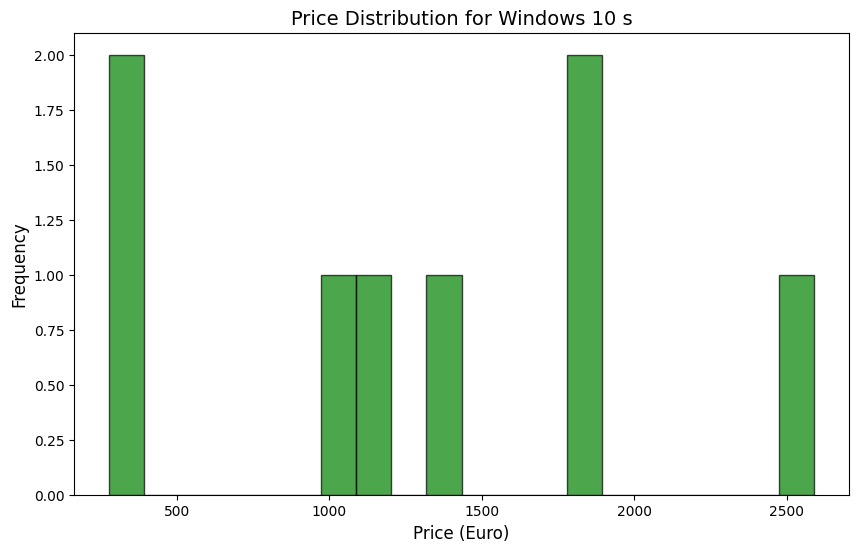

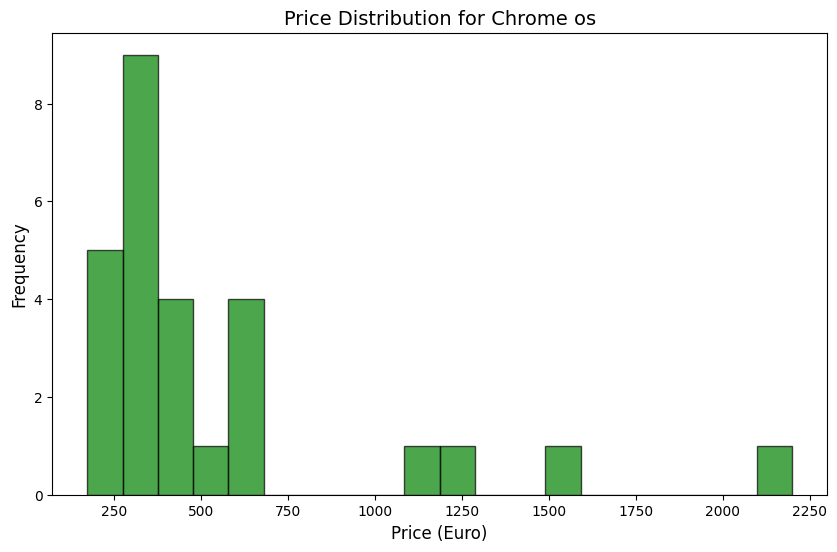

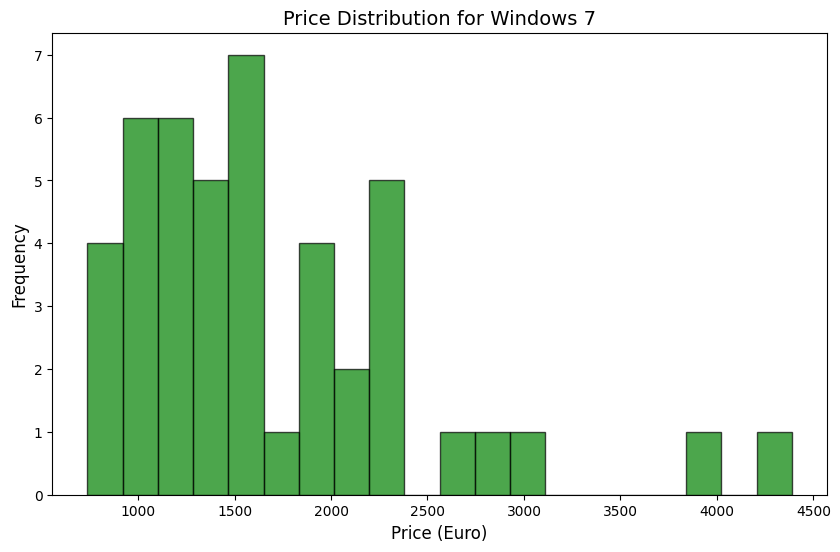

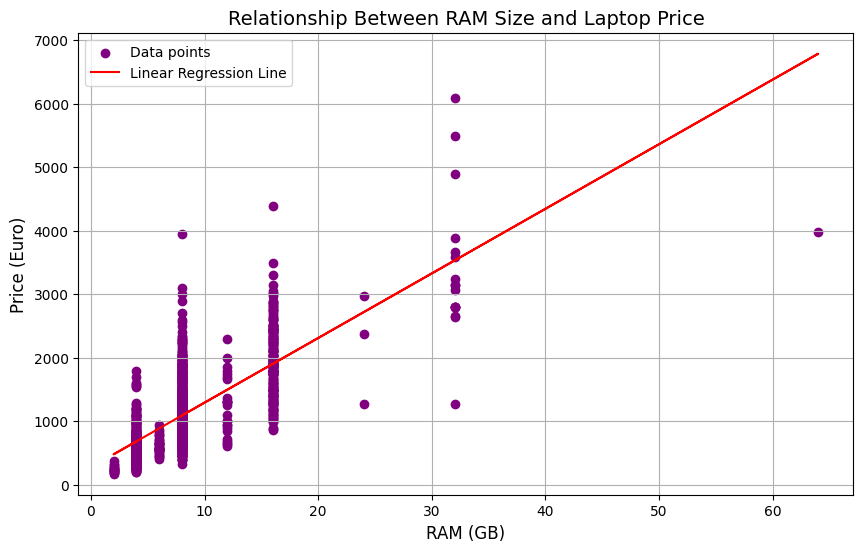


Storage Type Extraction:
                   Memory   Storage type
0               128GB SSD            SSD
1     128GB Flash Storage  Flash Storage
2               256GB SSD            SSD
3               512GB SSD            SSD
4               256GB SSD            SSD
...                   ...            ...
1270            128GB SSD            SSD
1271            512GB SSD            SSD
1272   64GB Flash Storage  Flash Storage
1273              1TB HDD            HDD
1274            500GB HDD            HDD

[1275 rows x 2 columns]


In [49]:
# Q3 - data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("laptop_price - dataset.csv")

plt.figure(figsize=(10,6))
plt.plot(data['Price (Euro)'], marker='o', linestyle = '', color='cyan') #plotting the figure of laptop prices 
plt.title('Price of All Laptops', fontsize=14)
plt.xlabel('Laptop Index', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)
plt.show()

company_avg_price = data.groupby('Company')['Price (Euro)'].mean() #finding the average of each company

most_expensive_company = company_avg_price.idxmax()
highest_avg_price = company_avg_price.max()

print(f"The company with the most expensive laptops is {most_expensive_company} with an average price of {highest_avg_price:.2f} Euros.")
print("\nAverage Price for Each Company:")
print(company_avg_price)

#finding all of the OS names
data['OpSys'] = data['OpSys'].str.lower().str.strip()
unique_opsys = data['OpSys'].unique()
print("\nUnique Operating Systems:")
print(unique_opsys)

data['OpSys'] = data['OpSys'].str.lower().str.strip()
for os in unique_opsys: #making a loop for each OS price distribution plot
    os_data = data[data['OpSys'] == os]
    plt.figure(figsize=(10, 6))
    plt.hist(os_data['Price (Euro)'], bins=20, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Price Distribution for {os.capitalize()}', fontsize=14)
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

data['RAM (GB)'] = pd.to_numeric(data['RAM (GB)'], errors='coerce') #making sufre data is numeric for both price and RAM
data['Price (Euro)'] = pd.to_numeric(data['Price (Euro)'], errors='coerce')

#finding the relationship between RAM and price using x and y points
X = data['RAM (GB)'].values  
y = data['Price (Euro)'].values 
slope, intercept = np.polyfit(X, y, 1)
y_pred = slope * X + intercept

plt.figure(figsize=(10, 6))
plt.scatter(data['RAM (GB)'], data['Price (Euro)'], color='purple', label='Data points')
plt.plot(data['RAM (GB)'], y_pred, color='red', label='Linear Regression Line')

plt.title('Relationship Between RAM Size and Laptop Price', fontsize=14)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#lastly, making a new column for memory type z
data['Storage type'] = data['Memory'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)')
print("\nStorage Type Extraction:")
print(data[['Memory', 'Storage type']])


bonus Q part 1 - we can use this data to analyse various things:
- computer type and price
- which computer is the cheapest and with the most  memory (getting the most for your money)
- which storage type is most common for which OS
- 

In [ ]:
#Bonus Q 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#which storage type is the most common for which OS?
